##Installing Data

In [1]:
!pip install opendatasets

In [2]:
dataset_link = 'https://www.kaggle.com/datasets/zarajamshaid/language-identification-datasst/download?datasetVersionNumber=1'

In [4]:
import opendatasets as od
od.download(dataset_link)

100%|██████████| 5.53M/5.53M [00:00<00:00, 45.5MB/s]

##Data Analyzing

In [2]:
import pandas as pd
df = pd.read_csv('/content/language-identification-datasst/dataset.csv') #Initializing the data as dataframe using pandas

In [3]:
df.shape

(22000, 2)

In [4]:
df.head()

Text  language
0  klement gottwaldi surnukeha palsameeriti ning ...  Estonian
1  sebes joseph pereira thomas  på eng the jesuit...   Swedish
2  ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...      Thai
3  விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...     Tamil
4  de spons behoort tot het geslacht haliclona en...     Dutch

In [5]:
df['language'].unique()

array(['Estonian', 'Swedish', 'Thai', 'Tamil', 'Dutch', 'Japanese',
       'Turkish', 'Latin', 'Urdu', 'Indonesian', 'Portugese', 'French',
       'Chinese', 'Korean', 'Hindi', 'Spanish', 'Pushto', 'Persian',
       'Romanian', 'Russian', 'English', 'Arabic'], dtype=object)

In [6]:
df.language.value_counts() #All texts and languages are equal

Estonian      1000
Swedish       1000
Thai          1000
Tamil         1000
Dutch         1000
Japanese      1000
Turkish       1000
Latin         1000
Urdu          1000
Indonesian    1000
Portugese     1000
French        1000
Chinese       1000
Korean        1000
Hindi         1000
Spanish       1000
Pushto        1000
Persian       1000
Romanian      1000
Russian       1000
English       1000
Arabic        1000
Name: language, dtype: int64

In [7]:
df.isnull().sum()

Text        0
language    0
dtype: int64

In [8]:
df.dtypes

Text        object
language    object
dtype: object

##Data Preprocessing

In [9]:
# dropping duplicate samples
df = df.drop_duplicates(subset='Text')
df = df.reset_index(drop=True)

In [10]:
df.shape

(21859, 2)

In [11]:
# non-alphanumeric characters to remove
nonalphanumeric = ['\'', '.', ',', '\"', ':', ';', '!', '@', '#', '$', '%', '^', '&',
                 '*', '(', ')', '-', '_', '+', '=', '[', ']', '{', '}', '\\', '?',
                 '/','>', '<', '|', ' ']
len(nonalphanumeric)

31

The function clean_text():

1. tokenizes the text into a list of words
2. lowers all words into lowercase
3. removes non alphanumeric from the list of lowered words
stems the words
4. returns them in form of a string seperated by " "

In [43]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

def clean_text(text):
    """
    Function to clean and preprocess text data.
    """
    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove non-alphanumeric characters
    words = [word.lower() for word in tokens if word not in nonalphanumeric]

    # Join the cleaned words back into a single string
    cleaned_text = " ".join(words)

    return cleaned_text

# Example usage
text = "This is an example sentence for lemmatization and stemming."
cleaned_text_result = clean_text(text)
print(cleaned_text_result)

this is an example sentence for lemmatization and stemming


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
# applying clean_text function to all rows in 'Text' column
df['clean_text'] = df['Text'].apply(clean_text)

####Label Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder

# using LabelEncoder to get placeholder number values for categorical variabel 'language'
le = LabelEncoder()
df['language_encoded'] = le.fit_transform(df['language'])
df.head()

Text  language  \
0  klement gottwaldi surnukeha palsameeriti ning ...  Estonian   
1  sebes joseph pereira thomas  på eng the jesuit...   Swedish   
2  ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...      Thai   
3  விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...     Tamil   
4  de spons behoort tot het geslacht haliclona en...     Dutch   

                                          clean_text  language_encoded  
0  klement gottwaldi surnukeha palsameeriti ning ...                 4  
1  sebes joseph pereira thomas på eng the jesuits...                17  
2  ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...                19  
3  விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...                18  
4  de spons behoort tot het geslacht haliclona en...                 2

In [15]:
# list of languages encoded with thier respective indices representing their placeholder numbers

lang_list = [i for i in range(22)]
lang_list = le.inverse_transform(lang_list)
lang_list = lang_list.tolist()
lang_list

['Arabic',
 'Chinese',
 'Dutch',
 'English',
 'Estonian',
 'French',
 'Hindi',
 'Indonesian',
 'Japanese',
 'Korean',
 'Latin',
 'Persian',
 'Portugese',
 'Pushto',
 'Romanian',
 'Russian',
 'Spanish',
 'Swedish',
 'Tamil',
 'Thai',
 'Turkish',
 'Urdu']

###Data Visualization

<ipython-input-16-808772b2938f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=df['language'], data=df, palette=palette)


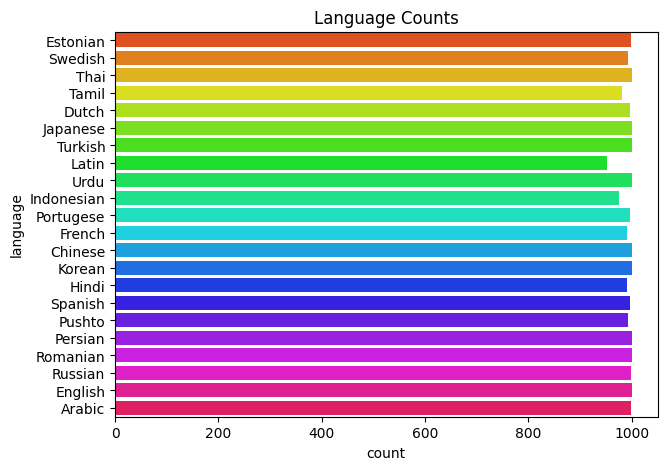

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a color palette with different colors for each language
palette = sns.color_palette("hsv", len(df['language'].unique()))

# Plotting a language-wise frequency distribution for the number of samples in each language
plt.figure(figsize=(7, 5))
plt.title('Language Counts')
ax = sns.countplot(y=df['language'], data=df, palette=palette)
plt.show()

In [17]:
import re
def remove_english(text):
    """
    function that takes text as input and returns text without english words
    """
    pat = "[a-zA-Z]+"
    text = re.sub(pat, "", text)
    return text

In [18]:
#Removing english words from chinese texts
df_Chinese = df[df['language']=='Chinese'] # Chinese data in dataset

clean_text = df.loc[df.language=='Chinese']['clean_text']
clean_text = clean_text.apply(remove_english) # removing english words
df_Chinese.loc[:,'clean_text'] = clean_text

# removing old chinese text and appending new cleaned chinese text
df.drop(df[df['language']=='Chinese'].index, inplace=True, axis=0)
df = df.append(df_Chinese)

<ipython-input-18-12a1ded40c52>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Chinese.loc[:,'clean_text'] = clean_text
<ipython-input-18-12a1ded40c52>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_Chinese)


In [19]:
# shuffling dataframe and resetting index
df = df.sample(frac=1).reset_index(drop=True)

###Feature Vectorizing

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
#Input Variable
# vectorizing input varible 'clean_text' into a matrix
features = df['clean_text']

cv = CountVectorizer() # ngram_range=(1,2)
features = cv.fit_transform(features)

# changing the datatype of the number into uint8 to consume less memory
features = features.astype('uint8') # uint8 and float32

In [21]:
# defining target variable
targets = df['language_encoded']

###Data Splitting

In [22]:
from sklearn.model_selection import train_test_split

# splitting data into training and testing datasets
X_train, X_val, y_train, y_val = train_test_split(features, targets, test_size=0.2, random_state=2007)

##Machine Learning

####Testing a Machine Learning Algorithm on this data

In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Initialize and train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = nb_classifier.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)


Validation Accuracy: 0.9595150960658737


Its giving very good accuracy overall!

##Deep Learning

In [24]:
#Converting tensors into arrays for training
X_train = X_train.toarray()
X_val = X_val.toarray()

In [25]:
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(17487, 277227) (4372, 277227) (17487,) (4372,)


In [26]:
input_size = X_train.shape[1]
input_size

277227

In [27]:
# outputsize hyperparatmeter

output_size = len(df['language_encoded'].unique())
num_classes = len(le.classes_)
output_size, num_classes

(22, 22)

In [28]:
#Model Architecture having 4 layers having relu activation in the first 3 layers and softmax in the last layer to get probabilities for all the languages.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense


model = Sequential([
    Dense(100, activation='relu', kernel_initializer='he_normal', input_shape=(input_size,)),
    Dense(80, activation='relu', kernel_initializer='he_normal'),
    Dense(50, activation='relu', kernel_initializer='he_normal'),
    Dense(output_size, activation='softmax')
])


In [29]:
#Learning rate scheduling
def lr_scheduler(epoch, lr):
    if epoch < 3:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [30]:
#Initializing early stoppin, optimizer and learning rate schedulerr
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
lr_scheduler_callback = LearningRateScheduler(lr_scheduler)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [31]:
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [32]:
model.summary() #Checking model parameters and layers

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               27722800  
                                                                 
 dense_1 (Dense)             (None, 80)                8080      
                                                                 
 dense_2 (Dense)             (None, 50)                4050      
                                                                 
 dense_3 (Dense)             (None, 22)                1122      
                                                                 
Total params: 27736052 (105.80 MB)
Trainable params: 27736052 (105.80 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


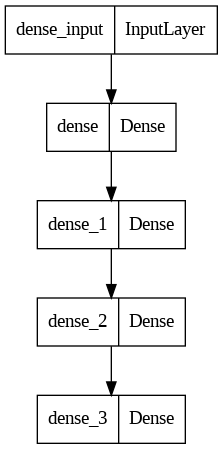

In [36]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [33]:
#Encoding the labels
y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes=22)
y_val_encoded = tf.keras.utils.to_categorical(y_val, num_classes=22)

###Training

In [34]:
hist=model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_val, y_val_encoded), callbacks=[early_stopping,lr_scheduler_callback])

Epoch 1/10
547/547 [==============================] - 16s 23ms/step - loss: 0.3566 - accuracy: 0.9326 - val_loss: 0.0814 - val_accuracy: 0.9774 - lr: 0.0010
Epoch 2/10
547/547 [==============================] - 10s 18ms/step - loss: 0.0071 - accuracy: 0.9988 - val_loss: 0.0810 - val_accuracy: 0.9790 - lr: 0.0010
Epoch 3/10
547/547 [==============================] - 10s 17ms/step - loss: 9.0363e-04 - accuracy: 0.9999 - val_loss: 0.0883 - val_accuracy: 0.9748 - lr: 0.0010
Epoch 4/10
547/547 [==============================] - 9s 16ms/step - loss: 6.1621e-04 - accuracy: 0.9999 - val_loss: 0.1048 - val_accuracy: 0.9716 - lr: 9.0484e-04
Epoch 5/10
547/547 [==============================] - 9s 17ms/step - loss: 5.1501e-04 - accuracy: 0.9999 - val_loss: 0.0975 - val_accuracy: 0.9764 - lr: 8.1873e-04
Epoch 6/10
547/547 [==============================] - 10s 18ms/step - loss: 5.1643e-04 - accuracy: 0.9999 - val_loss: 0.1120 - val_accuracy: 0.9705 - lr: 7.4082e-04


##Evaluation

In [35]:
loss, accuracy = model.evaluate(X_val, y_val_encoded)
print("Validation Accuracy:", accuracy)

137/137 [==============================] - 1s 7ms/step - loss: 0.0810 - accuracy: 0.9790
Validation Accuracy: 0.9789569973945618


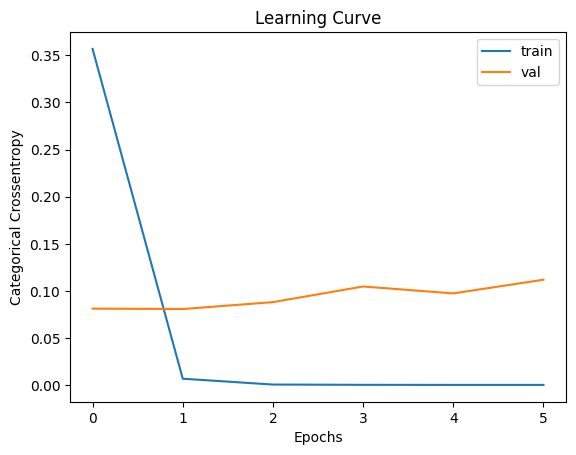

In [37]:
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Categorical Crossentropy')
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='val')
plt.legend()
plt.show()

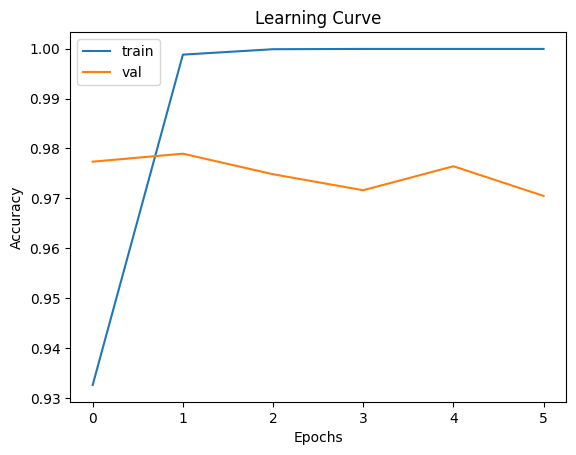

In [38]:
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='val')
plt.legend()
plt.show()

##Saving

In [39]:
model.save('language_identifcation_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##Testing

In [44]:
# using the model for prediction
import numpy as np
sent = """आप कितना सोचते हो
अगर आप ठिठुरती रातों को गिनें
अरे क्या आप मिल सकते हैं (अरे, क्या आप मिल सकते हैं?)
क्या तुम मिलोगे (क्या तुम मिलोगे?)
सर्दियों का अंत बताओ
एक कोमल वसंत के दिन तक
मैं चाहता हूं कि तुम तब तक रहो जब तक फूल खिल न जाएं
ज्यों का त्यों"""


def predict_language(text, model, cv, le):
    cleaned_text = clean_text(text) #Cleaning the text
    text_vectorized = cv.transform([cleaned_text]) #Converting tokens into vectors
    prediction = model.predict(text_vectorized) #Making predictions
    predicted_label = le.inverse_transform([np.argmax(prediction)])[0] #Get the first element of the list
    return predicted_label

predict_language(sent, model, cv, le)

1/1 [==============================] - 0s 315ms/step


'Hindi'